In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random

DATA CLEANING

In [2]:
# Specify the columns you want to read from the CSV file
#Reading only necessary columns from the huge dataset to reduce memory used
columns_to_read = ['sourceTaxonName', 'sourceTaxonRank', 'sourceTaxonSpeciesName', 'interactionTypeName', 'targetTaxonName', 'targetTaxonRank', 'targetTaxonSpeciesName', 'decimalLatitude', 'decimalLongitude','localityId', 'localityName']


In [3]:
interactions_data = pd.read_csv("interactions.csv", usecols=columns_to_read)

C:\Users\malav\AppData\Local\Temp\ipykernel_7484\3400410342.py:1: DtypeWarning: Columns (3,7,42,43,47,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions_data = pd.read_csv("interactions.csv", usecols=columns_to_read)


In [4]:
interactions_data

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName
0,Sciurus vulgaris,species,Sciurus vulgaris,preysOn,Hippolais icterina,species,Hippolais icterina,49.9,16.033333,GEONAMES:3077311,Czech Republic
1,Lanius collurio,species,Lanius collurio,preysOn,Sylvia atricapilla,species,Sylvia atricapilla,49.9,16.033333,GEONAMES:3077311,Czech Republic
2,Garrulus glandarius,species,Garrulus glandarius,preysOn,Turdus philomelos,species,Turdus philomelos,49.9,16.033333,GEONAMES:3077311,Czech Republic
3,Martes martes,species,Martes martes,preysOn,Sylvia atricapilla,species,Sylvia atricapilla,49.9,16.033333,GEONAMES:3077311,Czech Republic
4,Martes martes,species,Martes martes,preysOn,Hippolais icterina,species,Hippolais icterina,49.9,16.033333,GEONAMES:3077311,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...
13858139,Gadus morhua,species,Gadus morhua,eats,Animalia,kingdom,NaN,NaN,NaN,NaN,NaN
13858140,Gadus morhua,species,Gadus morhua,eats,Polychaeta,genus,NaN,NaN,NaN,NaN,NaN
13858141,Gadus morhua,species,Gadus morhua,eats,Glyceridae,family,NaN,NaN,NaN,NaN,NaN
13858142,Gadus morhua,species,Gadus morhua,eats,Cancer borealis,species,Cancer borealis,NaN,NaN,NaN,NaN


In [5]:
# Filter rows with interaction type 'eats'
eats_data = interactions_data[interactions_data['interactionTypeName'] == 'eats']

# Display the filtered data
pd.DataFrame(eats_data)

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName
318,Hydrellia,genus,NaN,eats,Typha latifolia,species,Typha latifolia,NaN,NaN,GEONAMES:4155751,"Florida, USA"
319,Hydrellia tibiospica,species,Hydrellia tibiospica,eats,Juncus debilis,species,Juncus debilis,NaN,NaN,NaN,NaN
320,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA"
321,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Populus,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA"
322,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA"
...,...,...,...,...,...,...,...,...,...,...,...
13858139,Gadus morhua,species,Gadus morhua,eats,Animalia,kingdom,NaN,NaN,NaN,NaN,NaN
13858140,Gadus morhua,species,Gadus morhua,eats,Polychaeta,genus,NaN,NaN,NaN,NaN,NaN
13858141,Gadus morhua,species,Gadus morhua,eats,Glyceridae,family,NaN,NaN,NaN,NaN,NaN
13858142,Gadus morhua,species,Gadus morhua,eats,Cancer borealis,species,Cancer borealis,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Missing values heatmap for Dataset')

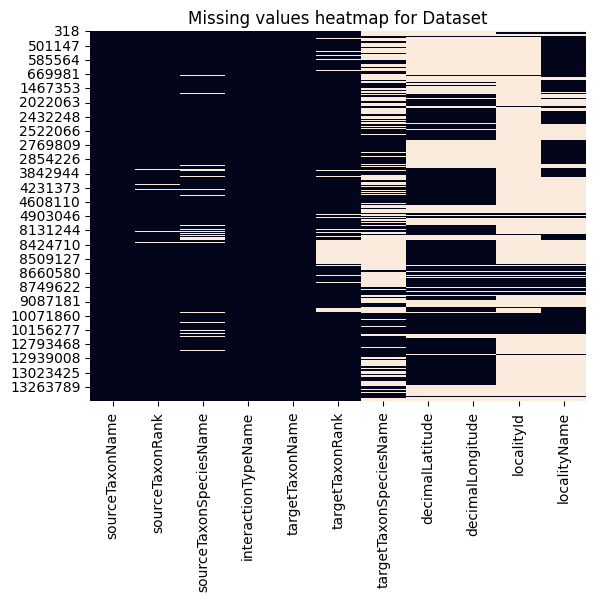

In [6]:
#displaying missing values as a heatmap
eats_data.isnull().sum()
sns.heatmap(eats_data.isnull(), cbar = False).set_title("Missing values heatmap for Dataset")

In [7]:
# Filter rows where either 'sourceTaxonName' or 'targetTaxonName' is NaN
nan_rows = eats_data[pd.isna(eats_data['sourceTaxonName']) | pd.isna(eats_data['targetTaxonName'])]

# Print the filtered rows
pd.DataFrame(nan_rows)

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName
2049347,Leiostomus xanthurus,species,Leiostomus xanthurus,eats,NaN,NaN,NaN,NaN,NaN,NaN,St. Vincent Sound Apalachicola
2049424,Stellifer lanceolatus,species,Stellifer lanceolatus,eats,NaN,NaN,NaN,NaN,NaN,NaN,Winyah Bay
8187636,Melanoplus arizonae,species,Melanoplus arizonae,eats,NaN,NaN,NaN,30.206431,-103.245385,NaN,NaN
8187637,Trimerotropis pallidipennis,species,Trimerotropis pallidipennis,eats,NaN,NaN,NaN,30.206431,-103.245385,NaN,NaN
8187638,Melanoplus desultorius,species,Melanoplus desultorius,eats,NaN,NaN,NaN,30.206431,-103.245385,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8187964,Hesperotettix viridis,species,Hesperotettix viridis,eats,NaN,NaN,NaN,30.206431,-103.245385,NaN,NaN
8187966,Cordillacris crenulata,species,Cordillacris crenulata,eats,NaN,NaN,NaN,30.302580,-103.455840,NaN,NaN
8187968,Dactylotum bicolor variegatum,NaN,Dactylotum bicolor,eats,NaN,NaN,NaN,30.302580,-103.455840,NaN,NaN
8187969,Acrolophitus maculipennis,species,Acrolophitus maculipennis,eats,NaN,NaN,NaN,30.206431,-103.245385,NaN,NaN


In [8]:
#replace selected rows in 'targetTaxonName' with NaN to filter these data uniformaly
eats_data['targetTaxonName'] = eats_data['targetTaxonName'].replace(['0', '\\N'], pd.NA)

# Filter rows where neither 'sourceTaxonName' nor 'targetTaxonName' is NaN
filtered_data = eats_data[~(pd.isna(eats_data['sourceTaxonName']) | pd.isna(eats_data['targetTaxonName']) | pd.isna(eats_data['sourceTaxonRank']) | pd.isna(eats_data['targetTaxonRank']))]

# Now 'filtered_data' contains rows where both 'sourceTaxonName' and 'targetTaxonName' are not NaN

# Filter rows where either 'sourceTaxonName' or 'targetTaxonName' is NaN
updated_nan_rows = filtered_data[pd.isna(eats_data['sourceTaxonName']) | pd.isna(eats_data['targetTaxonName']) | pd.isna(eats_data['sourceTaxonRank']) | pd.isna(eats_data['targetTaxonRank'])]

# Print the filtered rows
print(updated_nan_rows)

C:\Users\malav\AppData\Local\Temp\ipykernel_7484\3973591104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eats_data['targetTaxonName'] = eats_data['targetTaxonName'].replace(['0', '\\N'], pd.NA)
C:\Users\malav\AppData\Local\Temp\ipykernel_7484\3973591104.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  updated_nan_rows = filtered_data[pd.isna(eats_data['sourceTaxonName']) | pd.isna(eats_data['targetTaxonName']) | pd.isna(eats_data['sourceTaxonRank']) | pd.isna(eats_data['targetTaxonRank'])]


Empty DataFrame
Columns: [sourceTaxonName, sourceTaxonRank, sourceTaxonSpeciesName, interactionTypeName, targetTaxonName, targetTaxonRank, targetTaxonSpeciesName, decimalLatitude, decimalLongitude, localityId, localityName]
Index: []


In [9]:
#making a column 'interaction_pair' to remove duplicates and redundant data
filtered_data['interaction_pair'] = filtered_data.apply(lambda row: '_'.join(sorted([row['sourceTaxonName'], row['targetTaxonName']])), axis=1)
filtered_data

C:\Users\malav\AppData\Local\Temp\ipykernel_7484\3998521624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['interaction_pair'] = filtered_data.apply(lambda row: '_'.join(sorted([row['sourceTaxonName'], row['targetTaxonName']])), axis=1)


,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName,interaction_pair
318,Hydrellia,genus,NaN,eats,Typha latifolia,species,Typha latifolia,NaN,NaN,GEONAMES:4155751,"Florida, USA",Hydrellia_Typha latifolia
319,Hydrellia tibiospica,species,Hydrellia tibiospica,eats,Juncus debilis,species,Juncus debilis,NaN,NaN,NaN,NaN,Hydrellia tibiospica_Juncus debilis
320,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Salix
321,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Populus,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Populus
322,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Salix
...,...,...,...,...,...,...,...,...,...,...,...,...
13858139,Gadus morhua,species,Gadus morhua,eats,Animalia,kingdom,NaN,NaN,NaN,NaN,NaN,Animalia_Gadus morhua
13858140,Gadus morhua,species,Gadus morhua,eats,Polychaeta,genus,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Polychaeta
13858141,Gadus morhua,species,Gadus morhua,eats,Glyceridae,family,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Glyceridae
13858142,Gadus morhua,species,Gadus morhua,eats,Cancer borealis,species,Cancer borealis,NaN,NaN,NaN,NaN,Cancer borealis_Gadus morhua


In [10]:
filtered_data['interaction_pair'].value_counts()

interaction_pair
Athene cunicularia_Peromyscus maniculatus     26794
Bubo virginianus_Peromyscus maniculatus       21052
Insecta_Merlangius merlangus                   9733
Athene cunicularia_Microtus pennsylvanicus     9504
Bubo virginianus_Microtus pennsylvanicus       6675
                                              ...  
Leccinum versipelle_Pegomya incisiva              1
Leccinum scabrum agg._Pegomya incisiva            1
Leccinum versipelle_Pegomya notabilis             1
Leccinum scabrum agg._Pegomya tabida              1
Ampeliscidae_Gadus morhua                         1
Name: count, Length: 597149, dtype: int64

In [11]:
# Count the occurrences of each interaction pair
pair_counts = filtered_data['interaction_pair'].value_counts()

# Calculate the total count of all interaction pairs
total_count = pair_counts.sum()

# Calculate the fraction for each pair
filtered_data['interaction_pair_fraction'] = filtered_data['interaction_pair'].apply(lambda pair: pair_counts[pair] / total_count)

C:\Users\malav\AppData\Local\Temp\ipykernel_7484\4005796554.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['interaction_pair_fraction'] = filtered_data['interaction_pair'].apply(lambda pair: pair_counts[pair] / total_count)


In [12]:
filtered_data

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName,interaction_pair,interaction_pair_fraction
318,Hydrellia,genus,NaN,eats,Typha latifolia,species,Typha latifolia,NaN,NaN,GEONAMES:4155751,"Florida, USA",Hydrellia_Typha latifolia,5.252995e-07
319,Hydrellia tibiospica,species,Hydrellia tibiospica,eats,Juncus debilis,species,Juncus debilis,NaN,NaN,NaN,NaN,Hydrellia tibiospica_Juncus debilis,5.252995e-07
320,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Salix,1.050599e-06
321,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Populus,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Populus,1.050599e-06
322,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Salix,1.050599e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13858139,Gadus morhua,species,Gadus morhua,eats,Animalia,kingdom,NaN,NaN,NaN,NaN,NaN,Animalia_Gadus morhua,1.012777e-03
13858140,Gadus morhua,species,Gadus morhua,eats,Polychaeta,genus,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Polychaeta,1.888977e-03
13858141,Gadus morhua,species,Gadus morhua,eats,Glyceridae,family,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Glyceridae,1.418309e-05
13858142,Gadus morhua,species,Gadus morhua,eats,Cancer borealis,species,Cancer borealis,NaN,NaN,NaN,NaN,Cancer borealis_Gadus morhua,1.329008e-04


In [13]:
filtered_data[filtered_data['interaction_pair'] == 'Athene cunicularia_Peromyscus maniculatus']

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName,interaction_pair,interaction_pair_fraction
676276,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,35.41665,-115.58416,GEONAMES:5373972,Mojave Desert,Athene cunicularia_Peromyscus maniculatus,0.014075
1456347,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,NaN,NaN,NaN,Colorado:Larimer County; Weld County,Athene cunicularia_Peromyscus maniculatus,0.014075
1456462,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,NaN,NaN,NaN,Colorado:Larimer County; Weld County,Athene cunicularia_Peromyscus maniculatus,0.014075
1456510,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,NaN,NaN,NaN,Colorado:Larimer County; Weld County,Athene cunicularia_Peromyscus maniculatus,0.014075
1456616,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,NaN,NaN,NaN,Colorado:Larimer County; Weld County,Athene cunicularia_Peromyscus maniculatus,0.014075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573443,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,50.80000,-108.70000,NaN,NaN,Athene cunicularia_Peromyscus maniculatus,0.014075
2573444,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,51.20000,-112.20000,NaN,NaN,Athene cunicularia_Peromyscus maniculatus,0.014075
2573445,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,50.80000,-108.70000,NaN,NaN,Athene cunicularia_Peromyscus maniculatus,0.014075
2573448,Athene cunicularia,species,Athene cunicularia,eats,Peromyscus maniculatus,species,Peromyscus maniculatus,50.80000,-108.70000,NaN,NaN,Athene cunicularia_Peromyscus maniculatus,0.014075


In [14]:
#dropping duplicates and redundant data to avoid multiple parallel edges
cleaned_data = filtered_data.drop_duplicates(subset=['interaction_pair'])
cleaned_data

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName,interaction_pair,interaction_pair_fraction
318,Hydrellia,genus,NaN,eats,Typha latifolia,species,Typha latifolia,NaN,NaN,GEONAMES:4155751,"Florida, USA",Hydrellia_Typha latifolia,5.252995e-07
319,Hydrellia tibiospica,species,Hydrellia tibiospica,eats,Juncus debilis,species,Juncus debilis,NaN,NaN,NaN,NaN,Hydrellia tibiospica_Juncus debilis,5.252995e-07
320,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Salix,1.050599e-06
321,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Populus,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Populus,1.050599e-06
324,Argyrogramma verruca,species,Argyrogramma verruca,eats,Sagittaria,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Argyrogramma verruca_Sagittaria,5.252995e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13857667,Gadus morhua,species,Gadus morhua,eats,Myoxocephalus octodecemspinosus,species,Myoxocephalus octodecemspinosus,NaN,NaN,NaN,NaN,Gadus morhua_Myoxocephalus octodecemspinosus,5.252995e-07
13857846,Gadus morhua,species,Gadus morhua,eats,Orbiniidae,family,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Orbiniidae,5.252995e-07
13857958,Gadus morhua,species,Gadus morhua,eats,Nephtys picta,species,Nephtys picta,NaN,NaN,NaN,NaN,Gadus morhua_Nephtys picta,5.252995e-07
13857976,Gadus morhua,species,Gadus morhua,eats,Pectinariidae,family,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Pectinariidae,5.252995e-07


In [15]:
cleaned_data['localityName'].value_counts()

localityName
EUROPE                                                   73353
Brazil                                                   26557
Colombia                                                 13282
Costa Rica                                                6508
Kenya                                                     6204
                                                         ...  
South Africa|Game Guard Camp                                 1
Poggi di Prata                                               1
Canary Is.|Gran Tarajal, Fuerteventura, Canary Island        1
Philippines|Bolinao, Pangasinan, 1991                        1
Italy|Central Adriatic Sea,                                  1
Name: count, Length: 7064, dtype: int64

In [16]:
# Extract the required columns to make edge list for network visualisation
selected_columns = cleaned_data[['targetTaxonName', 'sourceTaxonName']]

# Save the selected columns to a CSV file
selected_columns.to_csv('target_source_pairs.csv', index=False)

# Print a message indicating successful CSV creation
print("CSV file 'target_source_pairs.csv' created successfully.")

CSV file 'target_source_pairs.csv' created successfully.


In [17]:
# Extract the required columns to make edge list for network visualisation
selected_columns = cleaned_data[['targetTaxonName', 'sourceTaxonName','interaction_pair_fraction']]

# Save the selected columns to a CSV file
selected_columns.to_csv('weighted_target_source.csv', index=False)

# Print a message indicating successful CSV creation
print("CSV file 'weighted_target_source.csv' created successfully.")

CSV file 'weighted_target_source.csv' created successfully.


In [18]:
#checking how many missing coordinates data is there
pd.DataFrame(cleaned_data[pd.isna(eats_data['decimalLatitude'])])  

C:\Users\malav\AppData\Local\Temp\ipykernel_7484\610503795.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(cleaned_data[pd.isna(eats_data['decimalLatitude'])])


,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName,interaction_pair,interaction_pair_fraction
318,Hydrellia,genus,NaN,eats,Typha latifolia,species,Typha latifolia,NaN,NaN,GEONAMES:4155751,"Florida, USA",Hydrellia_Typha latifolia,5.252995e-07
319,Hydrellia tibiospica,species,Hydrellia tibiospica,eats,Juncus debilis,species,Juncus debilis,NaN,NaN,NaN,NaN,Hydrellia tibiospica_Juncus debilis,5.252995e-07
320,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Salix,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Salix,1.050599e-06
321,Anacamptodes defectaria,species,Anacamptodes defectaria,eats,Populus,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Anacamptodes defectaria_Populus,1.050599e-06
324,Argyrogramma verruca,species,Argyrogramma verruca,eats,Sagittaria,genus,NaN,NaN,NaN,GEONAMES:4155751,"Florida, USA",Argyrogramma verruca_Sagittaria,5.252995e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13857667,Gadus morhua,species,Gadus morhua,eats,Myoxocephalus octodecemspinosus,species,Myoxocephalus octodecemspinosus,NaN,NaN,NaN,NaN,Gadus morhua_Myoxocephalus octodecemspinosus,5.252995e-07
13857846,Gadus morhua,species,Gadus morhua,eats,Orbiniidae,family,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Orbiniidae,5.252995e-07
13857958,Gadus morhua,species,Gadus morhua,eats,Nephtys picta,species,Nephtys picta,NaN,NaN,NaN,NaN,Gadus morhua_Nephtys picta,5.252995e-07
13857976,Gadus morhua,species,Gadus morhua,eats,Pectinariidae,family,NaN,NaN,NaN,NaN,NaN,Gadus morhua_Pectinariidae,5.252995e-07


AMAZON RAINFOREST DATA

In [19]:
#creating a data set with only data from amazon rainforest
#taking rough coordinates from the internet, and filtering out amazon data
amazon_data = cleaned_data[(cleaned_data['decimalLatitude'] >= -5) & 
                               (cleaned_data['decimalLatitude'] <= 16) &
                               (cleaned_data['decimalLongitude'] >= -72) & 
                               (cleaned_data['decimalLongitude'] <= -48)]

In [20]:
amazon_data

,sourceTaxonName,sourceTaxonRank,sourceTaxonSpeciesName,interactionTypeName,targetTaxonName,targetTaxonRank,targetTaxonSpeciesName,decimalLatitude,decimalLongitude,localityId,localityName,interaction_pair,interaction_pair_fraction
1434692,Egretta thula,species,Egretta thula,eats,Lebiasinidae,family,NaN,7.000000,-69.000000,NaN,"Venezuela:Near Mantecal, Apure",Egretta thula_Lebiasinidae,5.252995e-07
1434696,Egretta thula,species,Egretta thula,eats,Curimata,genus,NaN,7.000000,-69.000000,NaN,"Venezuela:Near Mantecal, Apure",Curimata_Egretta thula,5.252995e-07
1434697,Egretta thula,species,Egretta thula,eats,Cichlidae,family,NaN,7.000000,-69.000000,NaN,"Venezuela:Near Mantecal, Apure",Cichlidae_Egretta thula,1.050599e-06
1434714,Egretta thula,species,Egretta thula,eats,Arthropoda,phylum,NaN,7.000000,-69.000000,NaN,"Venezuela:Near Mantecal, Apure",Arthropoda_Egretta thula,2.626497e-06
1440884,Tyrannus melancholicus,species,Tyrannus melancholicus,eats,Hymenoptera,order,NaN,14.816670,-61.183333,NaN,Colombia:Caparu Biological Station,Hymenoptera_Tyrannus melancholicus,5.252995e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182852,Thraupis episcopus,species,Thraupis episcopus,eats,Castilla elastica,species,Castilla elastica,10.716667,-61.300000,Tropical rainforest. Trinidad.,Trinidad and Tobago,Castilla elastica_Thraupis episcopus,5.252995e-07
10182855,Tachyphonus rufus,species,Tachyphonus rufus,eats,Anacardium occidentale,species,Anacardium occidentale,10.716667,-61.300000,Tropical rainforest. Trinidad.,Trinidad and Tobago,Anacardium occidentale_Tachyphonus rufus,5.252995e-07
10182866,Coereba flaveola,species,Coereba flaveola,eats,Guapira eggersiana,species,Guapira eggersiana,10.716667,-61.300000,Tropical rainforest. Trinidad.,Trinidad and Tobago,Coereba flaveola_Guapira eggersiana,5.252995e-07
10182873,Euphonia violacea,species,Euphonia violacea,eats,Anacardium occidentale,species,Anacardium occidentale,10.716667,-61.300000,Tropical rainforest. Trinidad.,Trinidad and Tobago,Anacardium occidentale_Euphonia violacea,5.252995e-07


In [24]:
# Extract the required columns to make edge list for network visualisation
selected_columns = amazon_data[['targetTaxonName', 'sourceTaxonName','interaction_pair_fraction','decimalLatitude','decimalLongitude']]

# Save the selected columns to a CSV file
selected_columns.to_csv('amazon_data.csv', index=False)

# Print a message indicating successful CSV creation
print("CSV file 'amazon_data.csv' created successfully.")

CSV file 'amazon_data.csv' created successfully.


PATCH FRAGMENTATION, HABITAT LOSS AND MIGRATION

In [25]:
# Step 1: Define latitude and longitude ranges for creating patches
latitude_ranges = [(-5, 0), (0, 5), (5, 10), (10, 16)]
longitude_ranges = [(-72, -68), (-68, -64), (-64, -60), (-60, -56), (-56, -52), (-52, -48)]

In [26]:
# Create patches based on latitude and longitude ranges
patches = {}

# Loop through latitude and longitude ranges to create patches
for lat_range in latitude_ranges:
    for lon_range in longitude_ranges:
        # Filter data within the current latitude and longitude range
        patch_data = amazon_data[
            (amazon_data['decimalLatitude'] >= lat_range[0]) &
            (amazon_data['decimalLatitude'] < lat_range[1]) &
            (amazon_data['decimalLongitude'] >= lon_range[0]) &
            (amazon_data['decimalLongitude'] < lon_range[1])
        ]
        
        # Check if patch data is not empty
        if not patch_data.empty:
            # Create patch name based on coordinates
            patch_name = f"Patch_{lat_range[0]}_{lat_range[1]}_{lon_range[0]}_{lon_range[1]}"
            
            # Store patch data in patches dictionary
            patches[patch_name] = patch_data

In [27]:
# Step 2: Get the unique list of species from both source and target columns
all_species = set(amazon_data['sourceTaxonName'].unique()) | set(amazon_data['targetTaxonName'].unique())

# Step 3: Define the threshold distance for migration
migration_distance_threshold = 50  # Adjust this value based on realistic migration distances

# Step 4: Specify the probability of migration for all species
migration_probability = 0.8  # Adjust this value to increase the likelihood of migration

In [28]:
# Step 5: Simulate patch fragmentation, habitat loss, and migration
def simulate_migration_and_fire(patches, threshold, probability):
    """
    Simulates patch fragmentation, habitat loss (e.g., forest fire), and species migration.

    Parameters:
    - patches: Dictionary containing patch dataframes
    - threshold: Maximum distance for species migration
    - probability: Likelihood of migration for each species

    Returns:
    Updated patches dictionary after simulating habitat loss and migration.
    """
    # Simulate habitat loss (e.g., forest fire) in a random patch
    affected_patch_name = random.choice(list(patches.keys()))
    affected_patch_data = patches.pop(affected_patch_name)

    # Remove interactions outside the migration distance threshold in the affected patch
    distances = np.sqrt((affected_patch_data['decimalLatitude'].values[:, None] - affected_patch_data['decimalLatitude'].values) ** 2 +
                        (affected_patch_data['decimalLongitude'].values[:, None] - affected_patch_data['decimalLongitude'].values) ** 2)
    affected_interactions = distances <= threshold
    affected_patch_data = affected_patch_data[~affected_interactions.any(axis=0)]

    # Store interactions of the affected patch that can potentially migrate
    migrations = []
    for index, row in affected_patch_data.iterrows():
        for patch_name, patch_data in patches.items():
            distance = np.sqrt((row['decimalLatitude'] - patch_data['decimalLatitude']) ** 2 +
                               (row['decimalLongitude'] - patch_data['decimalLongitude']) ** 2)
            if distance <= threshold:
                migrations.append((row['sourceTaxonName'], row['targetTaxonName'], patch_name))

    # Randomly select interactions to migrate based on probability
    for source, target, target_patch in migrations:
        if random.uniform(0, 1) <= probability:
            patches[target_patch] = patches[target_patch].append({'sourceTaxonName': source, 'targetTaxonName': target}, ignore_index=True)

    return patches

In [29]:
# Simulate patch fragmentation, habitat loss, and migration
remaining_patches = simulate_migration_and_fire(patches, migration_distance_threshold, migration_probability)

In [30]:
# Step 6: Calculate the impact of the simulation on species and interactions

# Get the total number of remaining interactions after the simulation
total_remaining_interactions = sum(len(patch_data) for patch_data in remaining_patches.values())

# Get the list of all unique species from the remaining interactions
remaining_species_list = set()
for patch_data in remaining_patches.values():
    remaining_species_list.update(patch_data['sourceTaxonName'].unique())
    remaining_species_list.update(patch_data['targetTaxonName'].unique())

# Calculate the fraction of remaining unique species compared to all species in the dataset
total_unique_species = len(all_species)
remaining_unique_species = len(remaining_species_list)
unique_species_fraction = remaining_unique_species / total_unique_species

# Print the impact of the simulation on species diversity
print(f"Due to a forest fire and migration, the fraction of remaining unique species is: {unique_species_fraction:.4f} "
      f"({remaining_unique_species}/{total_unique_species})")

# Get the names of species that didn't survive due to the simulation
species_didnt_survive = all_species - remaining_species_list

# Print the names of species that didn't survive
print("\nThe species that didn't survive in the affected patch are:\n")
for species in species_didnt_survive:
    print(species)

Due to a forest fire and migration, the fraction of remaining unique species is: 0.9837 (965/981)

The species that didn't survive in the affected patch are:

Guettarda crispiflora
Geonoma undata
Sapium stylare
Elachistocleis surinamensis
Heliocarpus americanus
Corymbia citriodora
Colibri cyanotus
Callistemon citrinus
Erythrina poeppigiana
Ocotea
Tetrorchidium rubrivenium
Adelomyia melanogenys
Cecropia angustifolia
Inga oerstediana
Piptocoma
Pyrrhura hoematotis


In [31]:
# Step 7: Filter surviving interactions and save to CSV

# Create an empty list to store DataFrames for surviving interactions in each patch
patch_dfs = []

# Loop through each patch and filter interactions involving only surviving species
for patch_name, patch_data in remaining_patches.items():
    surviving_interactions = patch_data[
        (patch_data['sourceTaxonName'].isin(remaining_species_list)) &
        (patch_data['targetTaxonName'].isin(remaining_species_list))
    ]

    # Check if there are any surviving interactions in the current patch
    if not surviving_interactions.empty:
        # Add a column for patch name
        surviving_interactions['patch_name'] = patch_name

        # Append the DataFrame of surviving interactions to the list
        patch_dfs.append(surviving_interactions)

# Concatenate all patch DataFrames containing surviving interactions into a single DataFrame
remaining_interactions = pd.concat(patch_dfs, ignore_index=True)

# Write the DataFrame of remaining interactions to a CSV file
remaining_interactions.to_csv("remaining_interactions.csv", index=False)

# Print a message indicating successful CSV creation
print("CSV file 'remaining_interactions.csv' created successfully.")

CSV file 'remaining_interactions.csv' created successfully.
